# Pentathlon 2: Testing for the best frequency

In this notebook, I am going to analyse the Customer Lifetime Value based on the pentathlon dataset, which contains critical revenue and attrition data of a marketing experiment with 5 groups.

I answered the following questions:

1. What is the short-term CLV of 5 experiment group?
2. What is the long-term CLV of 5 experiment group?
3. Interpret the experiment result and give recommendations
4. Reflect on the current experiment and suggest ways to enhance it.

In [2]:
# loading required python packages
# you can add more packages as needed 
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_excel('./data/pentathlon-2.xls')
data.head()

,1 e-mail per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,Subscriber attrition for promotional e-mails,0.0042,0.0046,0.0039,0.0049,0.0047,0.0052,0.0049,0.0051
1,Average revenue from subscribed customer,0.29,0.31,0.3,0.32,0.29,0.26,0.27,0.28
2,Average revenue from unsubscribed customer,0,0.18,0.16,0.13,0.13,0.13,0.12,0.13
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 e-mails per week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8


### Calculate the CLV over 8 weeks for each email frequency

In [4]:
# load data from the excel file here
# each freq1-freq5 variable should be a pandas DataFrame with shape (8, 3)
# set the colum names to "attr" for subcriber attrition, "rev_sub" for average revenue
# from a subscribed customer, and "rev_unsub" for average revenue
# from an unsubscribed customer
freq1 = data[:3]
freq1 = pd.DataFrame(freq1.transpose()[1:] )
freq1.columns=['attr',"rev_sub",'rev_unsub']
freq1

,attr,rev_sub,rev_unsub
Week 1,0.0042,0.29,0
Week 2,0.0046,0.31,0.18
Week 3,0.0039,0.3,0.16
Week 4,0.0049,0.32,0.13
Week 5,0.0047,0.29,0.13
Week 6,0.0052,0.26,0.13
Week 7,0.0049,0.27,0.12
Week 8,0.0051,0.28,0.13


In [5]:
freq2 = pd.DataFrame(data[5:8].transpose()[1:])
freq2.columns=['attr',"rev_sub",'rev_unsub']

In [6]:
freq3 = pd.DataFrame(data[10:13].transpose()[1:])
freq3.columns=['attr',"rev_sub",'rev_unsub']
freq4 = pd.DataFrame(data[15:18].transpose()[1:])
freq4.columns=['attr',"rev_sub",'rev_unsub']
freq5 = pd.DataFrame(data[20:23].transpose()[1:])
freq5.columns=['attr',"rev_sub",'rev_unsub']

In [7]:
a = [1] 

for i in range(0,7):
    a.append((1-freq4['attr'])[i]*a[i])
freq4['ret'] = a
freq4['non-re'] = 1-freq4['ret']
freq4

,attr,rev_sub,rev_unsub,ret,non-re
Week 1,0.0385,0.36,0,1.000000,0.000000
Week 2,0.0525,0.34,0.19,0.961500,0.038500
Week 3,0.058,0.3,0.16,0.911021,0.088979
Week 4,0.0413,0.38,0.18,0.858182,0.141818
Week 5,0.0398,0.39,0.17,0.822739,0.177261
Week 6,0.031,0.34,0.12,0.789994,0.210006
Week 7,0.031,0.36,0.12,0.765504,0.234496
Week 8,0.031,0.37,0.12,0.741774,0.258226


### Assumptions:
1. The cost of goods sold was 60%.
2. Pentathlon used an annual discount rate of 10%.
3. Customers could submit a request to unsubscribe at any time, and for this assignment,I assume the weekly revenue is collected at the end of the week.

In [8]:
# list your assumptions here
weeks = np.arange(1, 9)
cogs = 0.6 #cost of goods sold
annual_discount_rate = 0.1
week_index = np.array(list(range(1, 9))) 
weekly_discount_rate = (np.power(1.1, (1/52)) -1)

In [9]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object should be of shape (8,)

In [10]:
profit_subcribed = freq4['rev_sub']*0.4
profit_unsubscribed = freq4['rev_unsub']*0.4
probability_subscribed = freq4['ret']
probability_unsubscribed = freq4['non-re']

In [11]:
expected_profit = probability_subscribed*profit_subcribed+probability_unsubscribed*profit_unsubscribed
pv_expected_profit = expected_profit/ ((1+ weekly_discount_rate))**week_index
clv = np.cumsum(pv_expected_profit)

In [12]:
# take your code above and use it as the base to define a function to calculate clv 
# this will avoid repetitive code
# note that the function "clv_calc" should be sufficiently general to work with the data
# for each of the 5 e-mail frequencies 
# note that the function must be defined in a cell above the code that calls the function

In [13]:
def clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame using the results from 
    the email frequency experiment
    
    Parameters
    ----------
    df : Pandas DataFrame (8, 3)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (8,) with values 1 through 8
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (8,)
        CLV values calculate for week 1 through week 8

    """
    
    # insert your code
    a = [1] 
    for i in range(0,7):
        a.append((1-df['attr'])[i]*a[i])
    df['ret'] = a
    df['non-re'] = 1-df['ret']
    profit_subcribed = df['rev_sub']*df['ret']
    profit_unsubscribed = df['rev_unsub']*df['non-re']
    probability_subscribed = profit_subcribed*(1-cogs)
    probability_unsubscribed = profit_unsubscribed*(1-cogs)

    expected_profit = probability_subscribed+probability_unsubscribed
    pv_expected_profit = expected_profit/ ((1+ wd))**weeks
    clv = np.cumsum(pv_expected_profit)
    return clv

In [14]:
# call the 'clv_calc` function to create a pandas dataframe `CLV8` 
# with shape (8, 6). One of the columns should be called 'weeks'
# and the others 'freq1', 'freq2', etc.

clv1 = clv_calc(freq1, weeks, cogs, weekly_discount_rate)
clv2 = clv_calc(freq2, weeks, cogs, weekly_discount_rate)
clv3 = clv_calc(freq3, weeks, cogs, weekly_discount_rate)
clv4 = clv_calc(freq4, weeks, cogs, weekly_discount_rate)
clv5 = clv_calc(freq5, weeks, cogs, weekly_discount_rate)

In [15]:
content = {'weeks':weeks,'freq1': clv1, 'freq2': clv2,'freq3': clv3,'freq4': clv4,
           'freq5': clv5 }
CLV8 = pd.DataFrame(content)
CLV8 = CLV8.reset_index(drop=True) 
CLV8 =CLV8.apply(pd.to_numeric)
CLV8

,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115788,0.139744,0.147729,0.143736,0.143736
1,2,0.239116,0.259042,0.269880,0.276937,0.271861
2,3,0.357969,0.397294,0.409082,0.391324,0.384678
3,4,0.484080,0.550043,0.558557,0.530951,0.522180
4,5,0.597913,0.670942,0.681991,0.670071,0.649644
5,6,0.699639,0.798453,0.809560,0.786305,0.773973
6,7,0.804652,0.932948,0.943915,0.906245,0.888073
7,8,0.913132,1.062909,1.071311,1.026644,0.994697


In [16]:
pd.melt(CLV8,id_vars = "weeks",value_name='frequency', var_name="clv" )

,weeks,clv,frequency
0,1,freq1,0.115788
1,2,freq1,0.239116
2,3,freq1,0.357969
3,4,freq1,0.484080
4,5,freq1,0.597913
5,6,freq1,0.699639
6,7,freq1,0.804652
7,8,freq1,0.913132
8,1,freq2,0.139744
9,2,freq2,0.259042


### Line graph of the CLV values for each plan change over the 8 week period. 

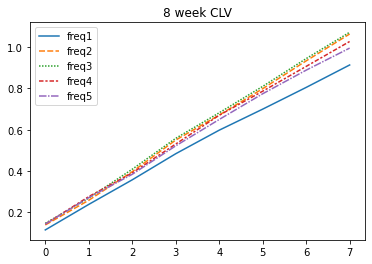

In [17]:
# use seaborn to create a line chart that shows CLV over the 8 week period
# for each of the 5 email frequencies (i.e., 1 plot with 5 lines)

fig = sns.lineplot(data = CLV8[['freq1',"freq2","freq3","freq4","freq5"]]).set(title='8 week CLV')


### What e-mail frequency should Pentathlon adopt based on the available data? 

I would recommend they choose the email frequency of 3 e-mails per week based on current available data and the current setting of the experiment . As we can see from the CLV8 table, the frequency of 3-email per week has the highest CLV at most given week(except week 2).

### What e-mail frequency to recommend if you considered a longer time horizon?

In [18]:
rate1 =[(CLV8['freq1'][i+1]/CLV8['freq1'][i]) -1 for i in range(len(CLV8)-1)]
rate2 =[(CLV8['freq2'][i+1]/CLV8['freq2'][i]) -1 for i in range(len(CLV8)-1)]
rate3 =[(CLV8['freq3'][i+1]/CLV8['freq3'][i]) -1 for i in range(len(CLV8)-1)]
rate4 =[(CLV8['freq4'][i+1]/CLV8['freq4'][i]) -1 for i in range(len(CLV8)-1)]
rate5 =[(CLV8['freq5'][i+1]/CLV8['freq5'][i]) -1 for i in range(len(CLV8)-1)]
rate_sum = pd.DataFrame(list(zip(rate1, rate2, rate3,rate4,rate5)),columns = ['freq1',"freq2","freq3","freq4","freq5"])
rate_sum

,freq1,freq2,freq3,freq4,freq5
0,1.065129,0.853691,0.826861,0.926703,0.891387
1,0.497051,0.533709,0.515789,0.413041,0.414982
2,0.352295,0.384471,0.365391,0.356807,0.357447
3,0.235153,0.219799,0.220987,0.262021,0.244100
4,0.170135,0.190048,0.187055,0.173465,0.191380
5,0.150096,0.168445,0.165960,0.152536,0.147421
6,0.134817,0.139301,0.134965,0.132855,0.120062


From a longer-term perspective, I would recommend they choose the email frequency of 2 e-mails per week. In the above table, the number indicates the week-over-week growth rate of the CLV based on different email frequency. We can see that the growth rate of freq2 is the highest among the 5 group at the end of 8-week period. It is because freq2 has a low Subscriber attrition rate, which gives it more revenue from subscriber in a longer time horizon.The Subscriber attrition rate of freq1 is also low, but the Average revenue from subscribed/unsubsribed customer is lower than freq2.

### CLV over 104 weeks (4 points)

Calculate the CLV for each of the 5 plans after 104 weeks using the average churn and revenue numbers from `pentathlon-2-avg.csv` in the git repo.

In [19]:
# load input data for simulation here
sim_clv = pd.read_csv('./data/pentathlon-2-avg.csv')
sim_clv

,email_freq,schurn,rev_sub,rev_unsub
0,freq1,0.004051,0.290003,0.123387
1,freq2,0.006266,0.340007,0.126506
2,freq3,0.023799,0.356240,0.144505
3,freq4,0.036650,0.355157,0.138084
4,freq5,0.055843,0.358784,0.131037


In [20]:
# list your assumptions here
weeks104 = np.arange(1, 104 + 1)
cogs = 0.6
annual_discount_rate = 0.1
weekly_discount_rate = (np.power(1.1, (1/52)) -1)

In [21]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object below should be either a float or of shape (104,)

In [22]:
a = [1] 
for i in range(0,103):
    a.append((1-sim_clv['schurn'])[3]*a[i])
ret = np.array(a)

In [23]:
profit_subcribed104 = np.repeat(sim_clv['rev_sub'][3],104)*0.4
profit_unsubscribed104 = np.repeat(sim_clv['rev_unsub'][3],104)*0.4
probability_subscribed104 = ret
probability_unsubscribed104 =  1-ret
expected_profit104 = profit_subcribed104*probability_subscribed104 + profit_unsubscribed104*probability_unsubscribed104
pv_expected_profit104 = expected_profit104/((1+ weekly_discount_rate))**weeks104
clv104 = np.cumsum(pv_expected_profit104)

In [24]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# define a function "sim_csv_calc" to avoid repetitive code
# note that the function must be defined in a cell above the code that calls the function

In [25]:
def sim_clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame with simulated 
    subscriber churn over a 104 week period
    
    Parameters
    ----------
    df : Pandas DataFrame (1, 4)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (n,) with values 1 through n
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (n,)
        CLV values calculate for week 1 through week n

    """
    a = [1] 
    for i in range(0,103):
        a.append((1-df['schurn'].iloc[0])*a[i])
    ret = np.array(a)
    profit_subcribed104 = np.repeat(df.rev_sub,104)*(1-cogs)
    profit_unsubscribed104 = np.repeat(df.rev_unsub,104)*(1-cogs)
    print(type(profit_subcribed104))
    probability_subscribed104 = ret
    probability_unsubscribed104 =  1-ret
    expected_profit104 = profit_subcribed104*probability_subscribed104 + profit_unsubscribed104*probability_unsubscribed104
    pv_expected_profit104 = expected_profit104/((1+ wd))**weeks
    clv = np.cumsum(pv_expected_profit104)
    # insert your code
    
    return clv

In [33]:
clv1_104 = sim_clv_calc(sim_clv[0:1],weeks104,cogs,weekly_discount_rate)

<class 'pandas.core.series.Series'>


In [34]:
clv1_104 = sim_clv_calc(sim_clv[0:1],weeks104,cogs,weekly_discount_rate)
clv2_104 = sim_clv_calc(sim_clv[1:2],weeks104,cogs,weekly_discount_rate)
clv3_104 = sim_clv_calc(sim_clv[2:3],weeks104,cogs,weekly_discount_rate)
clv4_104 = sim_clv_calc(sim_clv[3:4],weeks104,cogs,weekly_discount_rate)
clv5_104 = sim_clv_calc(sim_clv[4:5],weeks104,cogs,weekly_discount_rate)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [35]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# with shape (104, 6) using your sim_clv_calc function
# the column names should be freq1-freq5 and weeks

content_new = {'weeks':weeks104,'freq1': list(clv1_104), 'freq2': list(clv2_104),'freq3': list(clv3_104),'freq4': list(clv4_104),
           'freq5': list(clv5_104)}


In [36]:
CLV105 = pd.DataFrame().assign(
    weeks = weeks104,
   clv1_104 = sim_clv_calc(sim_clv[0:1],weeks104,cogs,weekly_discount_rate).values,
 clv2_104 = sim_clv_calc(sim_clv[1:2],weeks104,cogs,weekly_discount_rate).values,
 clv3_104 = sim_clv_calc(sim_clv[2:3],weeks104,cogs,weekly_discount_rate).values,
  clv4_104 = sim_clv_calc(sim_clv[3:4],weeks104,cogs,weekly_discount_rate).values,
 clv5_104 = sim_clv_calc(sim_clv[4:5],weeks104,cogs,weekly_discount_rate).values)

CLV105

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,weeks,clv1_104,clv2_104,clv3_104,clv4_104,clv5_104
0,1,0.115789,0.135754,0.142235,0.141803,0.143251
1,2,0.231097,0.270726,0.282201,0.280175,0.281171
2,3,0.345926,0.404922,0.419954,0.415245,0.414061
3,4,0.460279,0.538348,0.555548,0.547136,0.542207
4,5,0.574159,0.671009,0.689036,0.675966,0.665875
...,...,...,...,...,...,...
99,100,9.547118,10.480720,8.333190,7.253408,6.360057
100,101,9.625036,10.560623,8.387553,7.301032,6.403855
101,102,9.702663,10.640142,8.441666,7.348505,6.447561
102,103,9.779999,10.719281,8.495534,7.395831,6.491173


### Reflection: What are two limitations of the experiment. How could I address these limitations if I am conducting the experiment 

One limitations of the experiment could be the duration of the experiment.Based on the case information , this experiment lasts for 8-week and 8-week is relatively long for a past-pace business.If the experiment doesn't perform well, it will do damage to the sales revenue of the company.

The way to address this limitation could be to shorten the duration to 4-week. Based on the CLV8 table,we could find the best group based on available data at the end of week 4.

From my perspective,another limitation is there are 5 groups to compare. Based on my work experience as an analyst, we have at most 3 groups during experiment.Having 5 groups especially some bad-performing group during the experiment could do damage to the sales revenue as well.

Ways to address this limitation: one could be to do more market research beforehand or revisit previous experiments and only experiment on frequencies that are likely to have good CLV. Second could be to have 5 experiment group initially and eliminate some groups during the process of the experiment(when group performance is not good). 